In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/kaggle/input/dataset2/diabetess.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# Plots

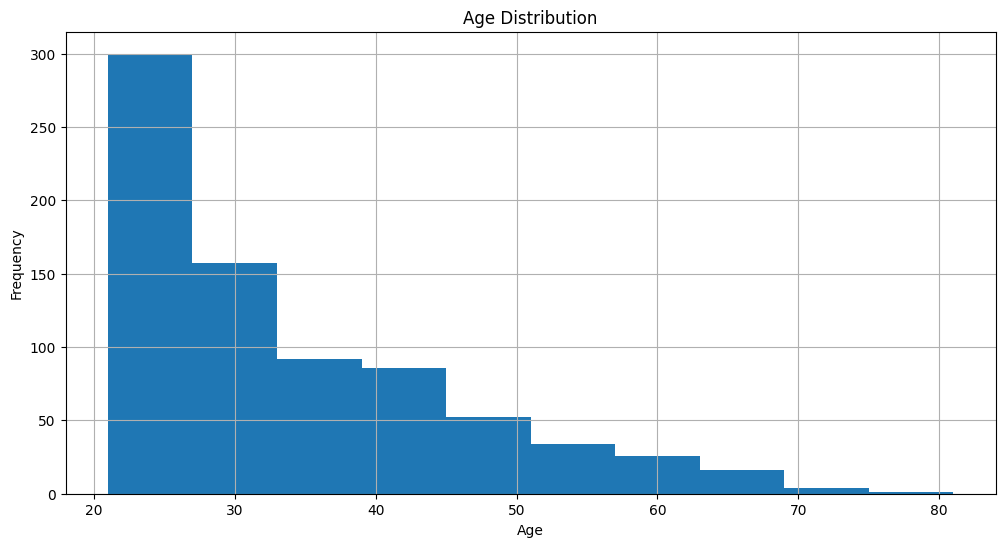

In [8]:
# Histogram of Age
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
df['Age'].hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

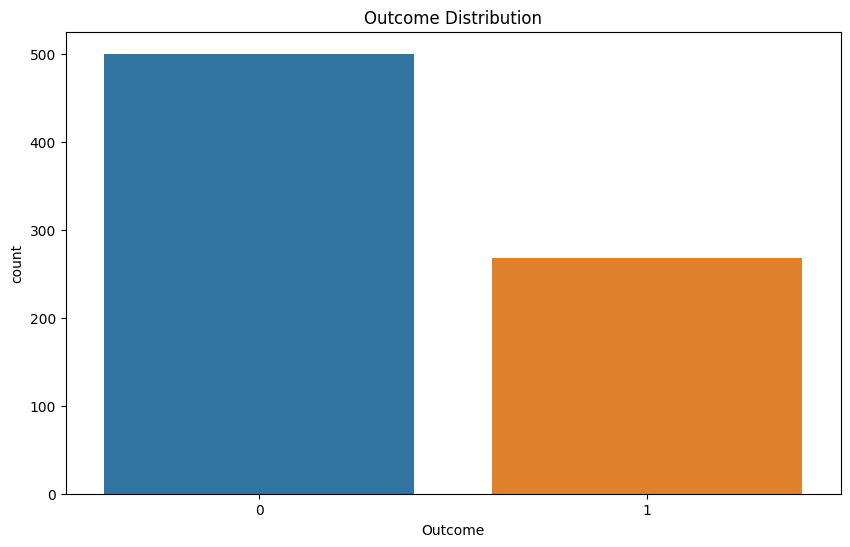

In [9]:
# Bar plot of the Outcome variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Outcome', data=df)
plt.title('Outcome Distribution')
plt.show()

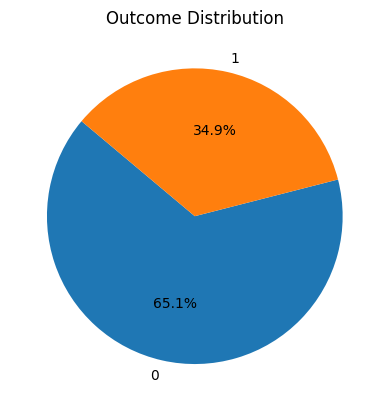

In [10]:
# Pie chart of Outcome distribution
labels = df['Outcome'].value_counts().index
values = df['Outcome'].value_counts().values
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Outcome Distribution')
plt.show()

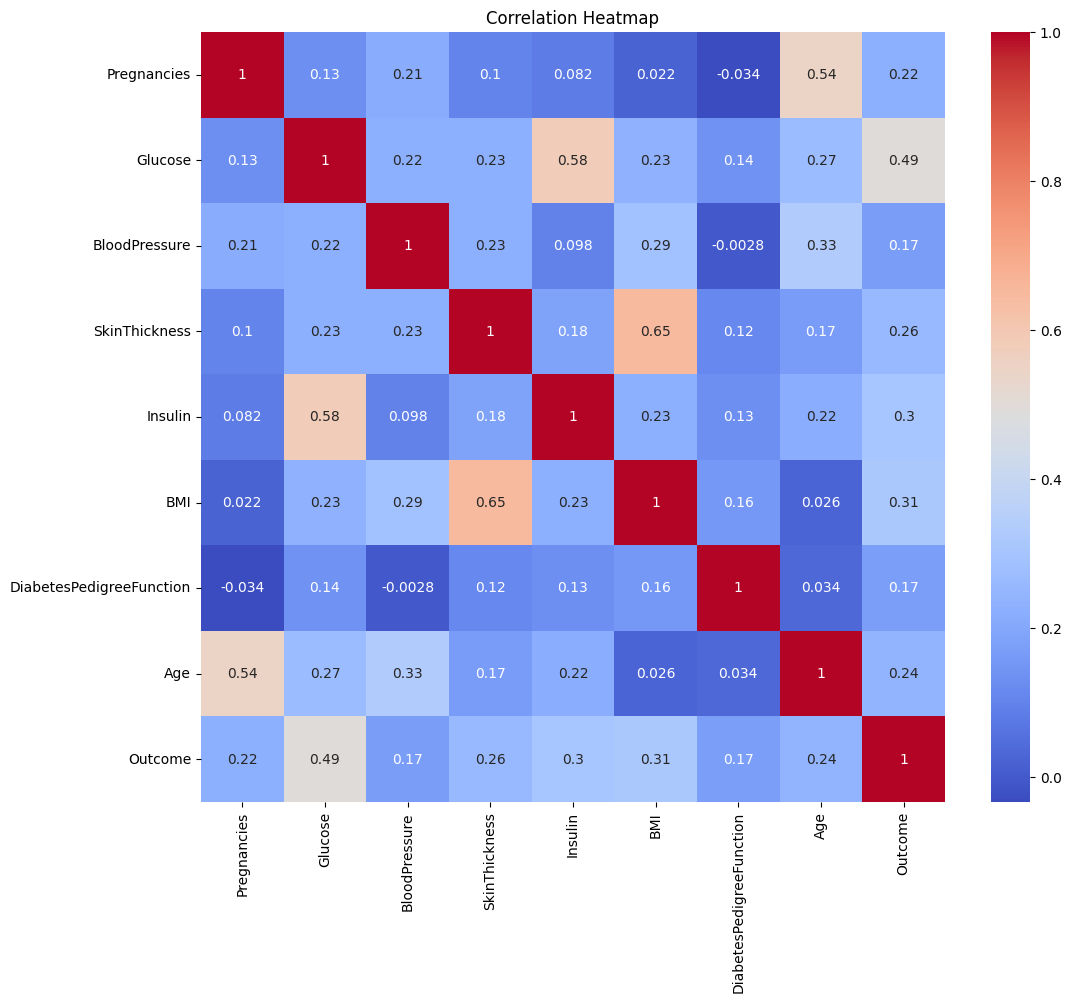

In [11]:
# Heatmap to show correlations
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Checking for null values
print("\nNull values in each column:")
print(df.isnull().sum())


Null values in each column:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [13]:
# Replace 0 with NaN in specific columns
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
print("\nNull values after replacing 0 with NaN:")
print(df.isnull().sum())


Null values after replacing 0 with NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [14]:
# Fill NaN values with median of each column
for column in df.columns[df.isnull().any()]:
    df[column].fillna(df[column].mean(), inplace=True)

print("\nNull values after filling NaNs with median:")
print(df.isnull().sum())


Null values after filling NaNs with median:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


/tmp/ipykernel_301/583623977.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


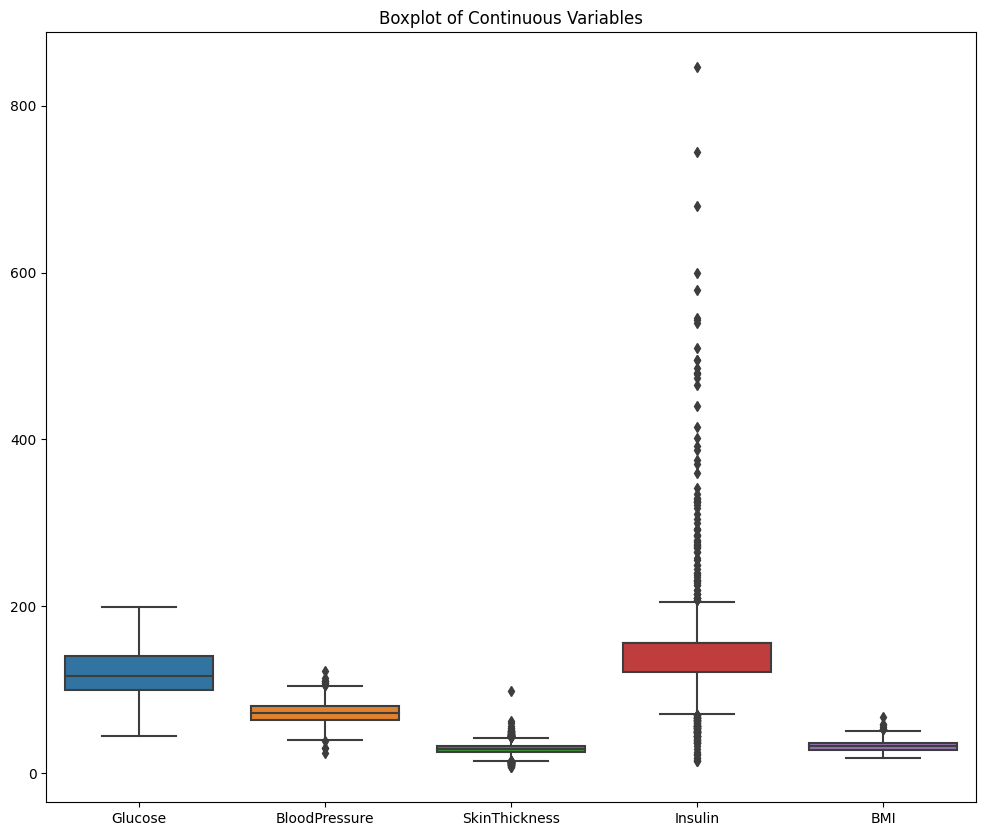

In [15]:
# Boxplot to identify outliers
plt.figure(figsize=(12, 10))
sns.boxplot(data=df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])
plt.title('Boxplot of Continuous Variables')
plt.show()

In [16]:
# Remove outliers using IQR method
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

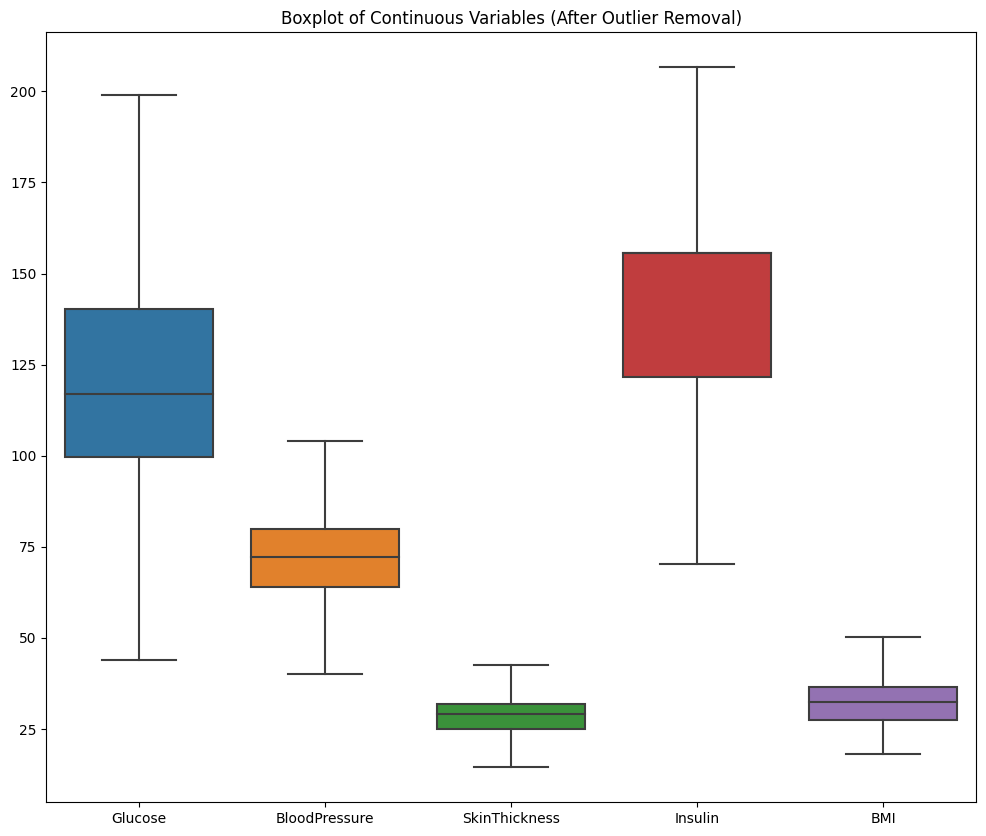

In [17]:
# Boxplot after outlier removal
plt.figure(figsize=(12, 10))
sns.boxplot(data=df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])
plt.title('Boxplot of Continuous Variables (After Outlier Removal)')
plt.show()

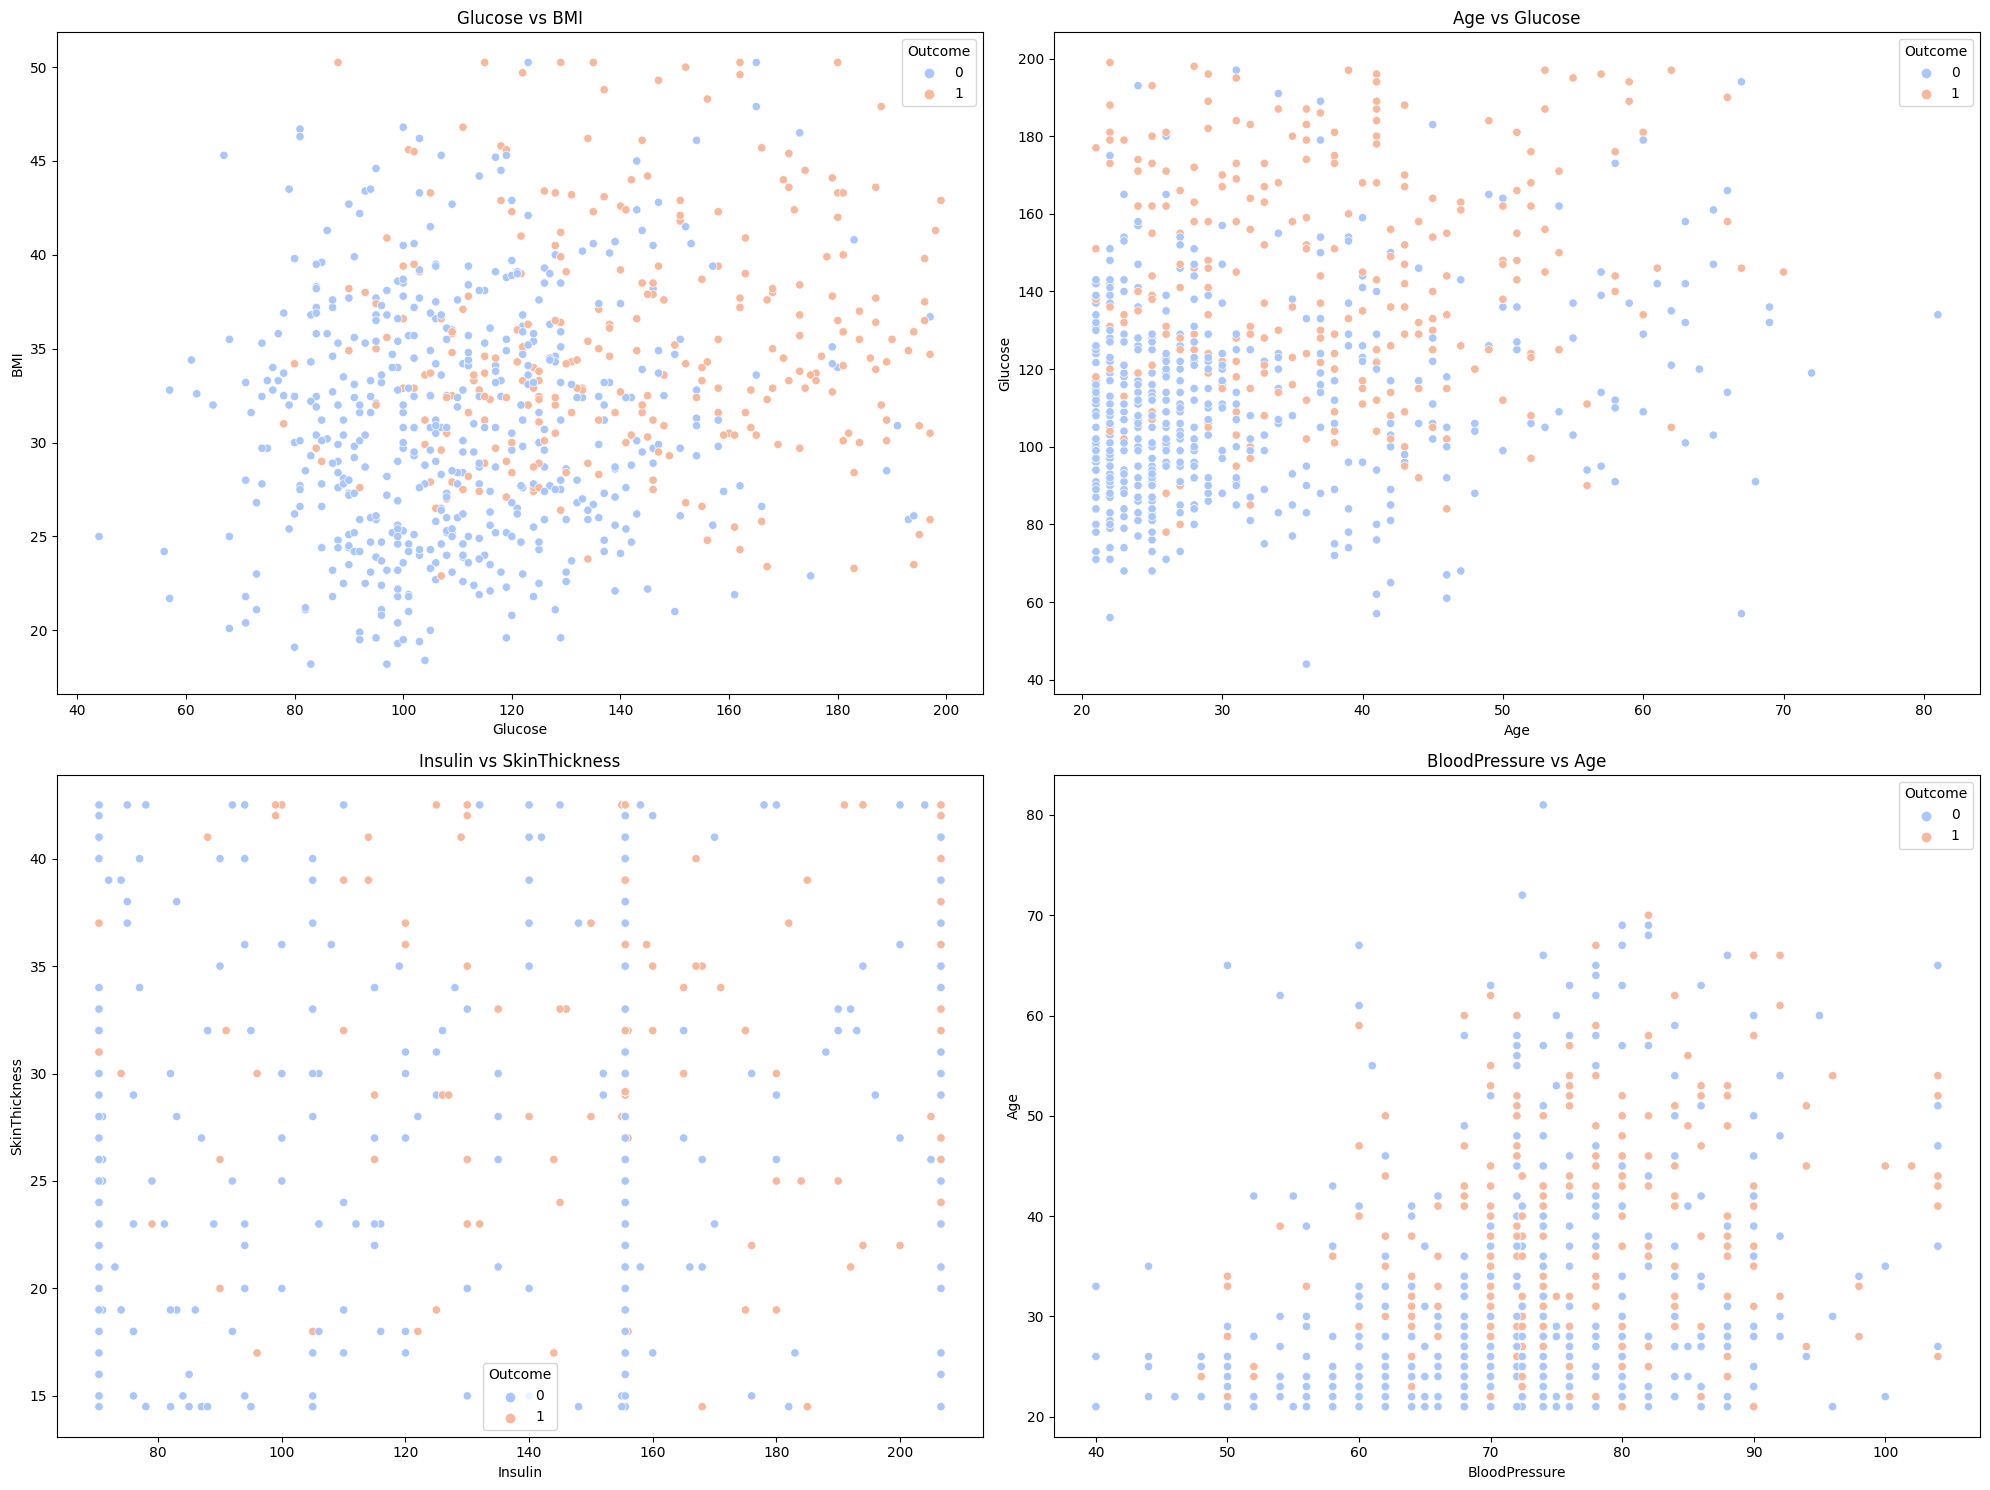

In [18]:
# Scatter plots between various features
plt.figure(figsize=(20, 15))

# Scatter plot between Glucose and BMI, colored by Outcome
plt.subplot(2, 2, 1)
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, palette='coolwarm')
plt.title('Glucose vs BMI')

# Scatter plot between Age and Glucose, colored by Outcome
plt.subplot(2, 2, 2)
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=df, palette='coolwarm')
plt.title('Age vs Glucose')

# Scatter plot between Insulin and SkinThickness, colored by Outcome
plt.subplot(2, 2, 3)
sns.scatterplot(x='Insulin', y='SkinThickness', hue='Outcome', data=df, palette='coolwarm')
plt.title('Insulin vs SkinThickness')

# Scatter plot between BloodPressure and Age, colored by Outcome
plt.subplot(2, 2, 4)
sns.scatterplot(x='BloodPressure', y='Age', hue='Outcome', data=df, palette='coolwarm')
plt.title('BloodPressure vs Age')

plt.tight_layout()
plt.show()

# Standardization & Normalization

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['Insulin_n']=scaler.fit_transform(df[['Insulin']])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_n
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,0.625000
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,0.625000
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,0.625000
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,0.173081
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,0.716428


In [20]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

df['Glucose_n']=scaler.fit_transform(df[['Glucose']])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_n,Glucose_n
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,0.625000,0.865108
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,0.625000,-1.206162
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,0.625000,2.015813
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,0.173081,-1.074652
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,0.716428,0.503458
